In [2]:
#google
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
#import packages
import os
import tensorflow as tf
import keras
from keras import layers
from keras.models import Model
from keras import optimizers
from keras.layers import Dropout, Flatten, Dense, BatchNormalization, GlobalAveragePooling2D, GlobalMaxPooling2D
from sklearn.preprocessing import LabelBinarizer
from keras.callbacks import ModelCheckpoint
from keras.optimizers import RMSprop, SGD, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3

Using TensorFlow backend.


In [0]:
#load dataset
train_path = '/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment_2/dataset1/train/' #80
valid_path = '/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment_2/dataset1/val/' #10
test_path = '/content/gdrive/My Drive/42028-DL-CNN-2020/Assignment_2/dataset1/test/' #10

In [0]:
#ImageGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
#datagen flow for multi-class
train_generator = train_datagen.flow_from_directory(train_path, target_size=(224,224),
    class_mode='categorical', batch_size=8)
valid_generator = test_datagen.flow_from_directory(valid_path, target_size=(224,224),
    class_mode='categorical', batch_size=8)
test_generator = test_datagen.flow_from_directory(test_path, target_size=(224,224),
    class_mode='categorical', batch_size=8)

Found 900 images belonging to 4 classes.
Found 113 images belonging to 4 classes.
Found 112 images belonging to 4 classes.


In [0]:
#resnet101
model = InceptionV3(weights= None, include_top=True, classes=4, input_shape=(224,224,3))

In [0]:
#compile model
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-5), metrics=['acc'])

In [9]:
#train model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,  
      epochs=25,
      validation_data=valid_generator,
      validation_steps=10,  
      verbose=1)

Epoch 1/25
100/100 [==============================] - 471s 5s/step - loss: 1.2946 - acc: 0.4963 - val_loss: 1.7140 - val_acc: 0.2750
Epoch 2/25
100/100 [==============================] - 93s 934ms/step - loss: 0.8363 - acc: 0.6683 - val_loss: 2.9520 - val_acc: 0.1918
Epoch 3/25
100/100 [==============================] - 40s 404ms/step - loss: 0.6483 - acc: 0.7701 - val_loss: 3.6021 - val_acc: 0.3288
Epoch 4/25
100/100 [==============================] - 41s 408ms/step - loss: 0.6366 - acc: 0.7677 - val_loss: 1.5827 - val_acc: 0.6000
Epoch 5/25
100/100 [==============================] - 40s 401ms/step - loss: 0.5898 - acc: 0.7739 - val_loss: 0.1356 - val_acc: 0.7671
Epoch 6/25
100/100 [==============================] - 40s 400ms/step - loss: 0.5330 - acc: 0.7987 - val_loss: 0.0329 - val_acc: 0.7808
Epoch 7/25
100/100 [==============================] - 41s 408ms/step - loss: 0.4771 - acc: 0.8329 - val_loss: 0.2712 - val_acc: 0.8500
Epoch 8/25
100/100 [==============================] - 41s

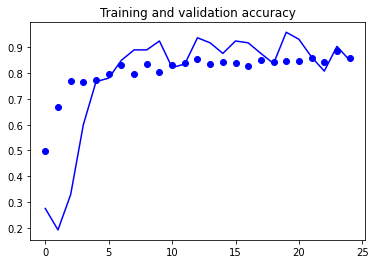

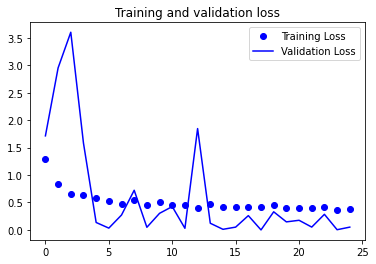

In [10]:
#plot graph
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()